# Install the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import joblib

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay

# Load the dataset

In [3]:
df = pd.read_csv("UPI.csv")

In [4]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
df.shape

(6362620, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Data Manupulatation

Duplicate data

In [9]:
df.duplicated().sum()

np.int64(0)

Null values

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Visualise the Data

In [11]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

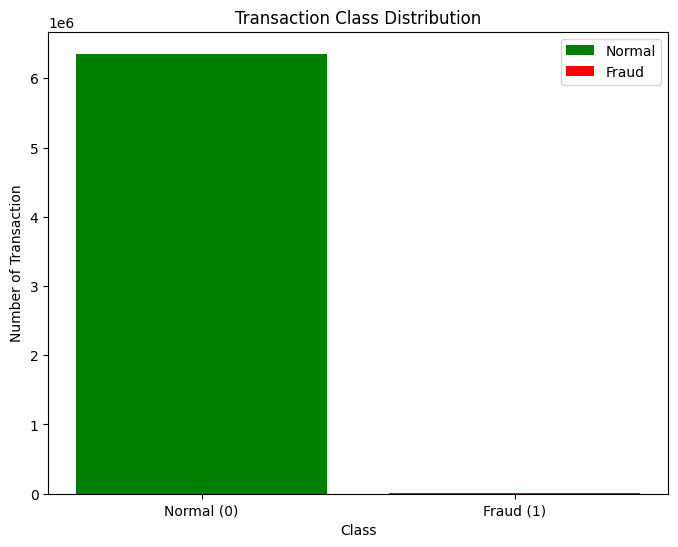

In [12]:
class_counts = df['isFraud'].value_counts()
labels = ['Normal (0)', 'Fraud (1)']
plt.figure(figsize=(8, 6))
bars=plt.bar(labels, class_counts, color=['green', 'red'], label=['Normal', 'Fraud'])
plt.title("Transaction Class Distribution")
plt.xlabel('Class')
plt.ylabel('Number of Transaction')
plt.legend()
plt.show()

In [13]:
X = df.drop("isFraud", axis='columns')
y = df["isFraud"]

In [14]:
X = df.drop("isFraud", axis='columns')
y = df["isFraud"]

In [15]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [16]:
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

In [17]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0


In [18]:
X = pd.get_dummies(X, columns=['type'], drop_first=True)

In [19]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,False,False,True,False


In [20]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [21]:
X_sm.value_counts()

step  amount       oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER
617   10000000.00  10000000.0     0.00            0.0             10000000.0      True           False       False         False            1962
387   10000000.00  10000000.0     0.00            0.0             10000000.0      True           False       False         False            1867
645   10000000.00  10000000.0     0.00            0.0             10000000.0      True           False       False         False             973
646   10000000.00  10000000.0     0.00            0.0             10000000.0      True           False       False         False             966
730   10000000.00  10000000.0     0.00            0.0             10000000.0      True           False       False         False             574
                                                                                                                                          

In [22]:
X_sm.shape

(12708814, 10)

In [23]:
X_sm.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,False,False,True,False


In [24]:
y_sm.value_counts()

isFraud
0    6354407
1    6354407
Name: count, dtype: int64

In [25]:
y_sm.shape

(12708814,)

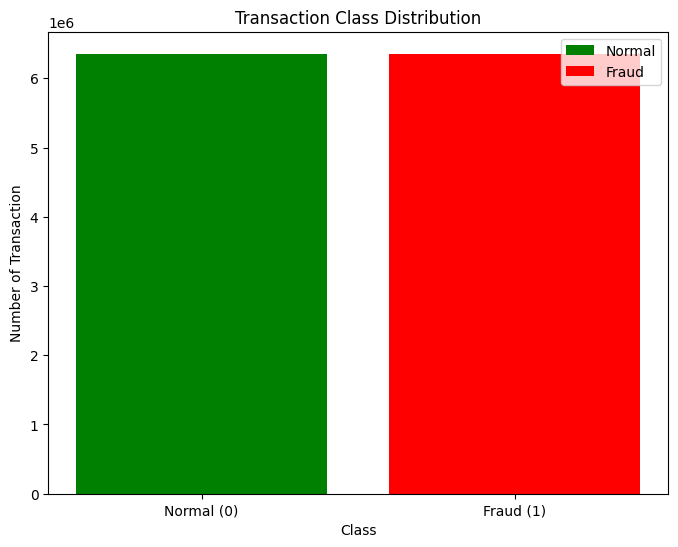

In [26]:
class_counts = y_sm.value_counts()
labels = ['Normal (0)', 'Fraud (1)']
plt.figure(figsize=(8, 6))
bars=plt.bar(labels, class_counts, color=['green', 'red'], label=['Normal', 'Fraud'])
plt.title("Transaction Class Distribution")
plt.xlabel('Class')
plt.ylabel('Number of Transaction')
plt.legend()
plt.show()

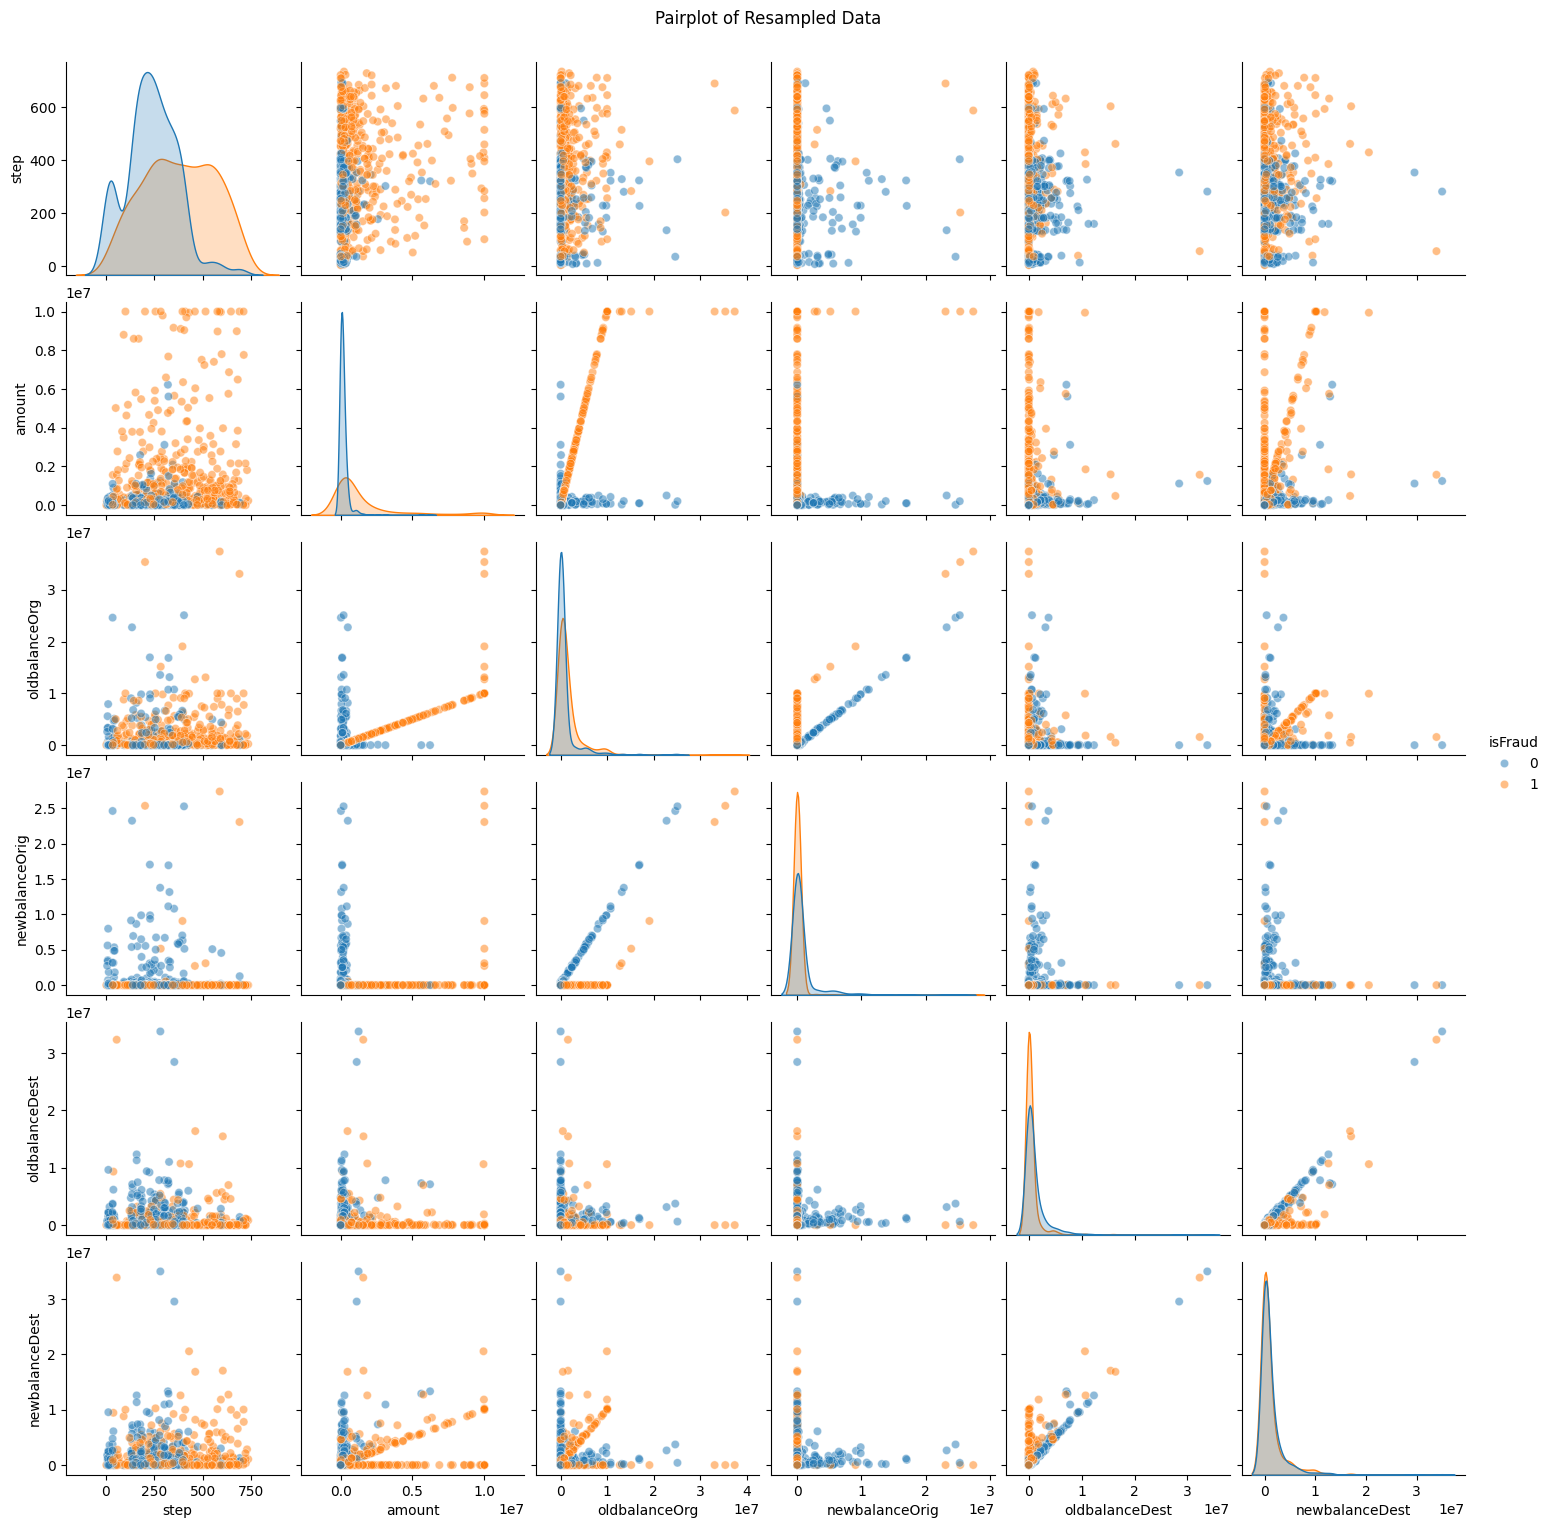

In [27]:
df_pairplot = X_sm.copy()
df_pairplot['isFraud'] = y_sm.values
numeric_cols = df_pairplot.select_dtypes(include=['int64', 'float64']).columns
df_pairplot_sample = df_pairplot.sample(n=1000, random_state=42)
sns.pairplot(df_pairplot_sample[numeric_cols], hue='isFraud', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Resampled Data', y=1.02)
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [29]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=3, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name}:\n---------------------")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression:
---------------------
Accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.94      0.96      0.95   1270837
           1       0.96      0.93      0.95   1270926

    accuracy                           0.95   2541763
   macro avg       0.95      0.95      0.95   2541763
weighted avg       0.95      0.95      0.95   2541763


Decision Tree:
---------------------
Accuracy: 0.9997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270837
           1       1.00      1.00      1.00   1270926

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763


Random Forest:
---------------------
Accuracy: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270837
           1       1.00      1.00      1.00   1270926

    accurac

c:\Users\dipay\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:02:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost:
---------------------
Accuracy: 0.9986
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270837
           1       1.00      1.00      1.00   1270926

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



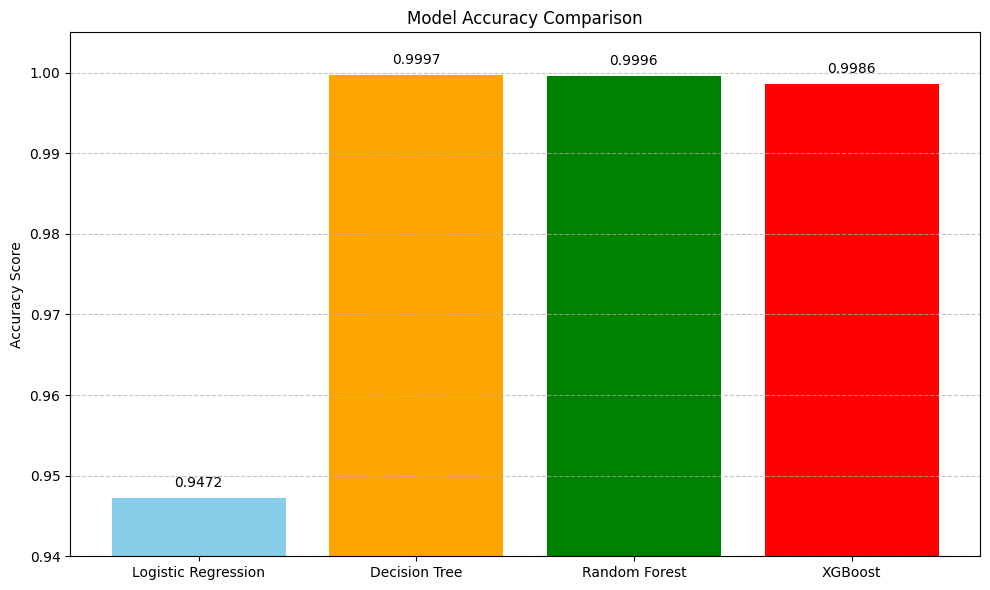

In [30]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracy_scores = [0.9472, 0.9997, 0.9996, 0.9986]
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color=['skyblue', 'orange', 'green', 'red'])
for bar, acc in zip(bars, accuracy_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.001, f'{acc:.4f}', ha='center', va='bottom', fontsize=10)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0.94, 1.005)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

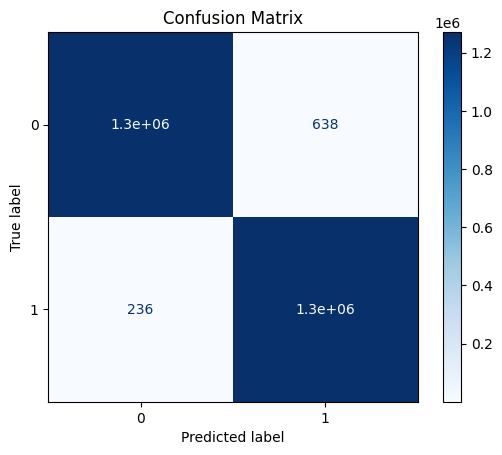

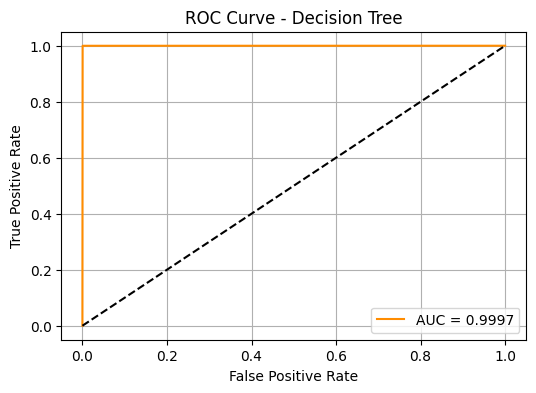

In [31]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
best_model = dt_model
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [32]:
joblib.dump(model, "best_model.pkl")
print("Model saved to best_model.pkl")

Model saved to best_model.pkl


In [33]:
best_model = joblib.load("best_model.pkl")

In [34]:
best_model = joblib.load("best_model.pkl")

def get_float(prompt):
    while True:
        try:
            return float(input(prompt))
        except ValueError:
            print("Please enter a valid number.")

def get_int(prompt):
    while True:
        try:
            return int(input(prompt))
        except ValueError:
            print("Please enter a valid integer.")

def get_transaction_type():
    valid_types = ['CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']
    while True:
        t = input(f"Enter transaction type ({', '.join(valid_types)}): ").upper()
        if t in valid_types:
            return [1 if t == vt else 0 for vt in valid_types]
        else:
            print("Invalid type. Please choose from the given options.")

step = get_int("Enter step (integer): ")
amount = get_float("Enter transaction amount: ")
oldbalanceOrg = get_float("Enter the balance of sender before transaction: ")
newbalanceOrig = get_float("Enter the balance of sender after transaction: ")
oldbalanceDest = get_float("Enter the balance of receiver before transaction: ")
newbalanceDest = get_float("Enter the balance of receiver after transaction: ")
type_CASH_OUT, type_DEBIT, type_PAYMENT, type_TRANSFER = get_transaction_type()

input_features = np.array([[step, amount, oldbalanceOrg, newbalanceOrig,
                            oldbalanceDest, newbalanceDest,
                            type_CASH_OUT, type_DEBIT, type_PAYMENT, type_TRANSFER]])

prediction = best_model.predict(input_features)[0]
proba = best_model.predict_proba(input_features)[0]

print("\nPrediction:", "Fraud" if prediction == 1 else "Not Fraud")
print(f"Confidence: {proba[1]*100:.2f}% for Fraud, {proba[0]*100:.2f}% for Not Fraud")

Invalid type. Please choose from the given options.
Invalid type. Please choose from the given options.

Prediction: Not Fraud
Confidence: 0.00% for Fraud, 100.00% for Not Fraud
